# IPR | Übungs Nachklausur

Student name: *[Todo]* <br>
Student ID: *[Todo]* <br>

Die Aufgaben sind in einem Browserfenster mit interaktivem Jupyter Notebook auf Google Colab zu lösen. 

Speichern Sie das Notebook in ihrem Google Drive („Save a copy in Drive“) damit Ihre Lösungen nicht verloren gehen, falls Ihr Browser oder Rechner abstürzt.

Die abzugebenden Lösungen sind Source Code der lauffähig ist und keine Syntax Fehler enthält (ähnlich zu den Übungsaufgaben).

Während der Prüfung dürfen Sie:
* Ihr Jupyter Notebook auf Drive nicht mit anderen Personen teilen,
* Taschenrechner, ein Blatt Papier und Stifte verwenden, 
* mit keinen weiteren Personen sprechen, und
* den Arbeitsplatz nicht verlassen.  


In [6]:
# --- SETUP ---
# Load the IPR-library first, so we can import it with import ipr
#!curl "https://raw.githubusercontent.com/IPR-WS2021/public-exam/main/ipr.py" --output "ipr.py" 

## Aufgabe 1: (4 Punkte)
Schreiben Sie eine Python Funktion `add_vector` die zwei Vektoren addiert. Diese soll dabei für Vektoren beliebiger Dimension funktionieren. 
Testen Sie die Funktion mit Vektoren der Dimension 3 und 4 und geben Sie diese Ergebnisse im Code aus. 

In [7]:
def add_vector(v1, v2):
    """Adds two vectors.
    """ 
    return [v1[i] + v2[i] for i in range(len(v1))]

print( add_vector([1, 2, 3], [4, 5, 6]) )
print( add_vector([1, 2, 3, 5], [4, 5, 6, 8]) )

[5, 7, 9]
[5, 7, 9, 13]


## Aufgabe 2: (4 Punkte)
Schreiben Sie eine Python Funktion `print_obj_file` die ein beliebiges Dreiecks-Polygon in einem OBJ Datei Format auf der Konsole ausgibt.

Die Eingabe sind die Vertices des Polygons sowie die Indizes für die Dreiecke.
Vertices sind 3 dimensional und werden als verschachtelte Liste angegeben. 
Indices sind in einem 1-dimensionalen Array angegeben. Jedes Dreieck besteht aus 3 Indizes.
Ein Vertex in einer OBJ-Datei beginnt mit einem „v“ am Anfang der Zeile.
Ein Dreieck beginnt mit „f“ am Anfang der Zeile. 
Mehrere Scheitelpunkte und Flächen belegen mehrere Zeilen.
Beachten Sie, dass Indizes in OBJ-Dateien bei 1 beginnen.

Rufen Sie die Funktion mit dem Quadrilateral (`vertices` und `indices`) im folgenden Code Block auf.
Das Quadrilateral-Beispiel soll folgende Ausgabe erzeugen:

```text	
# List of vertices, with (x y z [w=1]) coordinates.
v 0.5 1.0 0.0
v 0.0 0.0 0.0
v 1.0 0.3 0.0
v -0.5 0.7 0.0
# Polygonal face element (3 indices for a triangle) 
f 1 2 3
f 1 4 2
```

In [8]:
# 4 vertices 
v0 = [0.5, 1.0, 0.0]
v1 = [0.0, 0.0, 0.0]
v2 = [1.0, 0.3, 0.0]
v3 = [-.5, 0.7, 0.0]

# store 4 vertices in a list:
vertices = [v0,v1,v2,v3]
# store the indices of the triangles in a list:
indices  = [0,1,2,  # triangle 1
            0,3,1]  # triangle 2

def print_obj_file(vertices, indices):
    """Prints a mesh in an OBJ format.
    """
    print("# List of vertices, with (x y z [w=1]) coordinates.") # comment on top of vertex list
    for v in vertices:
        print(f"v {v[0]} {v[1]} {v[2]}") # write vertex

    print("# Polygonal face element (3 indices for a triangle)") # comment for face
    for si in range(0,len(indices)-2,3):
        print("f " + " ".join([str(ix+1) for ix in indices[si:si+3]]))

# call to the function:
print_obj_file(vertices,indices)


# List of vertices, with (x y z [w=1]) coordinates.
v 0.5 1.0 0.0
v 0.0 0.0 0.0
v 1.0 0.3 0.0
v -0.5 0.7 0.0
# Polygonal face element (3 indices for a triangle)
f 1 2 3
f 1 4 2


## Aufgabe 3: (4 Punkte)

Implementieren Sie folgende Funktionen:
-  `get_pixel`, die u,v-Koordinaten nimmt und den entsprechenden Pixelwert zurückgibt.
-  `set_pixel`, die u,v-Koordinaten und einen Pixelwert nimmt und den entsprechenden Pixelwert im Bild setzt.

Stellen Sie sicher, dass Sie eine Begrenzungsprüfung auf die u,v-Koordinaten anwenden und ungültige Koordinaten ordnungsgemäß behandeln in dem Sie eine leere Liste oder None zurück liefern oder ungültige Pixel ignorieren.

[128, 0, 255]
[]
[0, 100, 0]


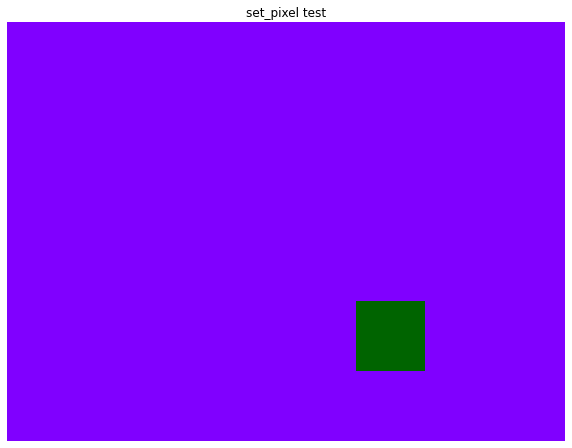

In [10]:
from ipr import make_image, imshow

def set_pixel(img, u, v, color):
    """Changes the color of a pixel in an image.
    """  
    if 0<=v<len(img) and 0<=u<len(img[v]): # boundary checks!
        img[v][u] = color # note that w,h or x,y are flipped!
    else:
        print(f"Warning: invalid coordinates {u},{v}")

    return img

def get_pixel(img, u, v):
    """Returns the color of a pixel in an image.
    """
    if 0<=v<len(img) and 0<=u<len(img[v]): # boundary checks!
        return img[v][u]
    else:
        return []


# Test cases for set_pixel and get_pixel
img = make_image(8, 6, [128,0,255])

# - get_pixel tests -----------------------------------------------------------
print( get_pixel(img,0,0) ) # should be [128,0,255]!
print( get_pixel(img,4,10) ) # invalid index. Return value should be None or empty list!

# - set_pixel tests -----------------------------------------------------------
set_pixel(img,5,4,[0,100,0])
print(get_pixel(img,5,4)) # should be [0,100,0], now!
set_pixel(img,10,2,[0,0,0]) # invalid index. should do nothing!

imshow("set_pixel test", img) # image should be purple with a green pixel in the middle!

## Aufgabe 4: (4 Punkte)

Implementieren Sie die Funktion `make_checkerboard_image` die ein Schachbrett Muster erzeugt.
Das resultierende Bild zeigt ein Schachbrett-Quadrate, die abwechselnd `color1` und `color2` verwenden.
Zusätzlich kann die Größe der Quadrate über den Parameter `checker_size` gesteuert werden. 
Eine Quadratgröße von N bedeutet, dass ein Quadrat NxN Pixel groß ist. 
Die Parameter `color1` und `color2` sowie die `checker_size` sind optional und sollen default Werte verwenden, wenn sie nicht angegeben werden.


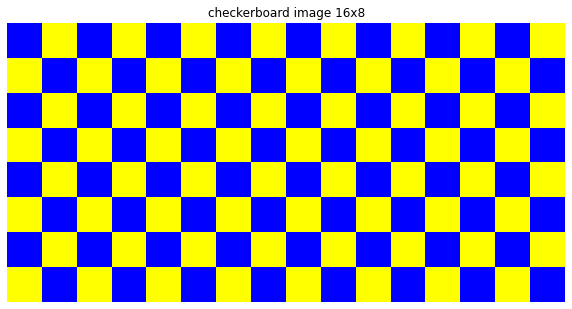

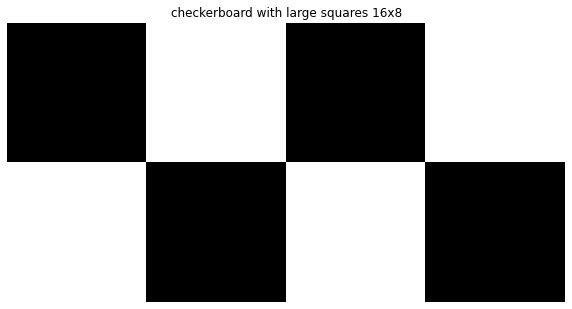

In [11]:
def make_checkerboard_image(width, height, color1=[0,0,0], color2=[255,255,255], checker_size=1):
    """Create a new checkerboard image of the given width and height. 
    The squares of the checkerboard are pixels of colors color1 and color2 and the checkersize determines the size (in pixels) of the squares.
    """
    return [[color1 if (int(r/checker_size)+int(c/checker_size))%2==0 else color2 for c in range(width)] for r in range(height)]

# Test cases for make_checkerboard_image
chess = make_checkerboard_image(16, 8, [0,0,255], [255,255,0]) 
imshow(f"checkerboard image {len(chess[0])}x{len(chess)}", chess) # image is a yellow/blue checkerboard. The left top square is blue. 
chess = make_checkerboard_image(16, 8, checker_size=4)
imshow(f"checkerboard with large squares {len(chess[0])}x{len(chess)}", chess) # image is a black/white checkerboard, where one square occupies 4 pixels. 
